In [1]:
import geopandas as gp
import fiona
import shapely
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [19]:
if os.path.isfile("livestock-exports.xlsx"):
    filepath = "livestock-exports.xlsx"
    print("loading from file")
if os.path.isfile("ne_10m_admin_0_countries.shp"):
    filepath2 = "ne_10m_admin_0_countries.shp"
    print("loading from file")

ld = pd.read_excel(filepath)
cd = gp.GeoDataFrame.from_file(filepath2)
cd.set_crs(epsg=5234, inplace=True, allow_override=True)
print("done")

loading from file
loading from file
done


In [27]:
cols_to_drop = ['NAME_KO','NAME_PL','NAME_PT','NAME_RU','NAME_SV','NAME_TR','NAME_VI','NAME_ZH','NAME_FR','NAME_EL','NAME_HI','NAME_HU','NAME_JA','NAME_NL','NAME_AR','NAME_BN','NAME_',]
cd.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

In [28]:
cd.sample(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_DE,NAME_EN,NAME_ES,NAME_ID,NAME_IT,geometry
102,Admin-0 country,0,3,Angola,AGO,0,2,Sovereign country,Angola,AGO,...,3.0,7.0,1159320323,Q916,Angola,Angola,Angola,Angola,Angola,"MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4..."
137,Admin-0 country,0,2,Colombia,COL,0,2,Sovereign country,Colombia,COL,...,2.0,7.0,1159320517,Q739,Kolumbien,Colombia,Colombia,Kolombia,Colombia,"MULTIPOLYGON (((-78.82868 1.43431, -78.81286 1..."


In [34]:
cd.plot

         Quantity
Species          
Cattle     122484
Goats        1526
Sheep      975752


<function matplotlib.pyplot.show(close=None, block=None)>

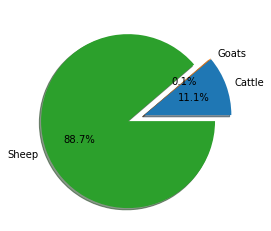

In [4]:
wa_ld_2014 = ld.loc[(ld['State'] == 'WA') & (ld['Year'] == 2014)]
wa_ld_2014_species = wa_ld_2014.groupby(['Species']).sum()
wa_ld_2014_species_culled = wa_ld_2014_species.drop(columns=['Year'])
print (wa_ld_2014_species_culled)

Cattle = wa_ld_2014_species_culled.iloc[0,0]
Goats = wa_ld_2014_species_culled.iloc[1,0]
Sheep = wa_ld_2014_species_culled.iloc[2,0]

plt.pie([Cattle, Goats, Sheep], labels= ['Cattle', 'Goats', 'Sheep'], shadow=True, autopct='%1.1f%%', explode= (0, 0, 0.2),)
plt.show

         Quantity
Species          
Camels         18
Goats       25652
Sheep      225232


([<matplotlib.patches.Wedge at 0x28b9a9bb310>,
 [Text(1.0999999720617484, 0.0002479196504640194, 'Camels'),
  Text(1.0435885320629825, 0.34773981041380575, 'Goats'),
  Text(-1.233424456332834, -0.41068736347744206, 'Sheep')],
 [Text(0.5999999847609535, 0.00013522890025310146, '0.0%'),
  Text(0.5692301083979904, 0.1896762602257122, '10.2%'),
  Text(-0.7590304346663594, -0.2527306852168874, '89.8%')])

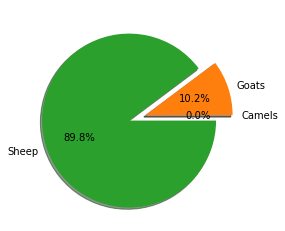

In [5]:
sa_ld_2014 = ld.loc[(ld['State'] == 'SA') & (ld['Year'] == 2014)]
sa_ld_2014_species = sa_ld_2014.groupby(['Species']).sum()
sa_ld_2014_species_culled = sa_ld_2014_species.drop(columns=['Year'])

print(sa_ld_2014_species_culled)

Camels = sa_ld_2014_species_culled.iloc[0,0]
Goats = sa_ld_2014_species_culled.iloc[1,0]
Sheep = sa_ld_2014_species_culled.iloc[2,0]

plt.pie([Camels, Goats, Sheep], labels= ['Camels', 'Goats', 'Sheep'], shadow=True, autopct='%1.1f%%', explode= (0, 0, 0.2))

         Quantity
Species          
Camels         16
Cattle       1397
Goats       22245
Sheep        9265


<function matplotlib.pyplot.show(close=None, block=None)>

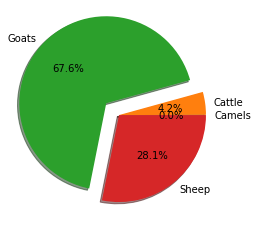

In [6]:
nsw_ld_2014 = ld.loc[(ld['State'] == 'NSW') & (ld['Year'] == 2014)]
nsw_ld_2014_species = nsw_ld_2014.groupby(['Species']).sum()
nsw_ld_2014_species_culled = nsw_ld_2014_species.drop(columns=['Year'])

print(nsw_ld_2014_species_culled)

Camels = nsw_ld_2014_species_culled.iloc[0,0]
Cattle = nsw_ld_2014_species_culled.iloc[1,0]
Goats = nsw_ld_2014_species_culled.iloc[2,0]
Sheep = nsw_ld_2014_species_culled.iloc[3,0]

plt.pie([Camels, Cattle, Goats, Sheep], labels= ['Camels', 'Cattle', 'Goats', 'Sheep'], shadow=True, autopct='%1.1f%%', explode= (0, 0, 0.2, 0))
plt.show

         Quantity
Species          
Alpacas       595
Camels         24
Cattle      77506
Goats         734
Sheep        4375


<function matplotlib.pyplot.show(close=None, block=None)>

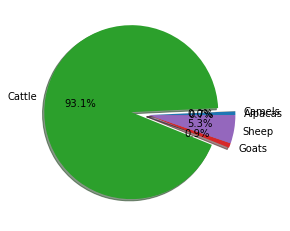

In [7]:
vic_ld_2014 = ld.loc[(ld['State'] == 'VIC') & (ld['Year'] == 2014)]
vic_ld_2014_species = vic_ld_2014.groupby(['Species']).sum()
vic_ld_2014_species_culled = vic_ld_2014_species.drop(columns=['Year'])

print(vic_ld_2014_species_culled)

Alpacas = vic_ld_2014_species_culled.iloc[0,0]
Camels = vic_ld_2014_species_culled.iloc[1,0]
Cattle = vic_ld_2014_species_culled.iloc[2,0]
Goats = vic_ld_2014_species_culled.iloc[3,0]
Sheep = vic_ld_2014_species_culled.iloc[4,0]

plt.pie([Alpacas, Camels, Cattle, Goats, Sheep], labels= ['Alpacas', 'Camels', 'Cattle', 'Goats', 'Sheep'], shadow=True, autopct='%1.1f%%', explode= (0, 0, 0.2, 0, 0))
plt.show

         Quantity
Species          
Cattle     137417


<function matplotlib.pyplot.show(close=None, block=None)>

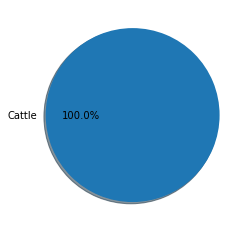

In [8]:
qld_ld_2014 = ld.loc[(ld['State'] == 'QLD') & (ld['Year'] == 2014)]
qld_ld_2014_species = qld_ld_2014.groupby(['Species']).sum()
qld_ld_2014_species_culled = qld_ld_2014_species.drop(columns=['Year'])

print(qld_ld_2014_species_culled)

Cattle = qld_ld_2014_species_culled.iloc[0,0]

plt.pie([Cattle], labels= ['Cattle'], shadow=True, autopct='%1.1f%%')
plt.show

         Quantity
Species          
Buffalo      3144
Cattle     317365
Goats         154


<function matplotlib.pyplot.show(close=None, block=None)>

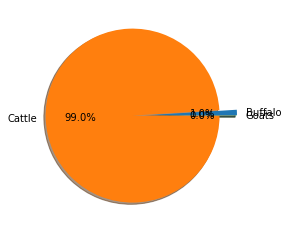

In [9]:
nt_ld_2014 = ld.loc[(ld['State'] == 'NT') & (ld['Year'] == 2014)]
nt_ld_2014_species = nt_ld_2014.groupby(['Species']).sum()
nt_ld_2014_species_culled = nt_ld_2014_species.drop(columns=['Year'])

print(nt_ld_2014_species_culled)

Buffalo = nt_ld_2014_species_culled.iloc[0,0]
Cattle = nt_ld_2014_species_culled.iloc[1,0]
Goats = nt_ld_2014_species_culled.iloc[2,0]

plt.pie([Buffalo, Cattle, Goats], labels= ['Buffalo', 'Cattle', 'Goats'], shadow=True, autopct='%1.1f%%', explode= (0, 0.2, 0))
plt.show

       Quantity
State          
NSW       32923
NT       320663
QLD      137417
SA       250902
VIC       83234
WA      1099762


<function matplotlib.pyplot.show(close=None, block=None)>

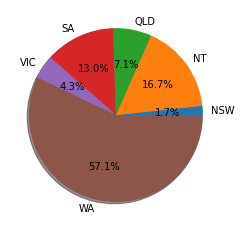

In [10]:
ld_2014 = ld.loc[(ld['Year'] == 2014)]
ld_2014_species = ld_2014.groupby(['State']).sum()
ld_2014_species_culled = ld_2014_species.drop(columns=['Year'])

print(ld_2014_species_culled)

NSW = ld_2014_species_culled.iloc[0,0]
NT = ld_2014_species_culled.iloc[1,0]
QLD = ld_2014_species_culled.iloc[2,0]
SA = ld_2014_species_culled.iloc[3,0]
VIC = ld_2014_species_culled.iloc[4,0]
WA = ld_2014_species_culled.iloc[5,0]

plt.pie([NSW, NT, QLD, SA, VIC, WA], labels= ['NSW', 'NT', 'QLD', 'SA', 'VIC', 'WA'], shadow=True, autopct='%1.1f%%', explode= (0, 0, 0, 0, 0, 0))
plt.show

           Quantity
End Use            
Breeder       75239
Feeder       427305
Slaughter   1422357


<function matplotlib.pyplot.show(close=None, block=None)>

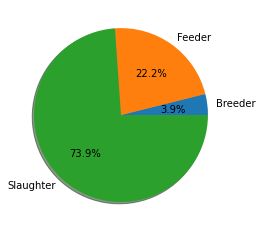

In [11]:
p_ld_2014 = ld.loc[(ld['Year'] == 2014)]
p_ld_2014_purpose = p_ld_2014.groupby(['End Use']).sum()
p_ld_2014_purpose_culled = p_ld_2014_purpose.drop(columns=['Year'])

print(p_ld_2014_purpose_culled)

Breeder = p_ld_2014_purpose_culled.iloc[0,0]
Feeder = p_ld_2014_purpose_culled.iloc[1,0]
Slaughter = p_ld_2014_purpose_culled.iloc[2,0]


plt.pie([Breeder, Feeder, Slaughter], labels= ['Breeder', 'Feeder', 'Slaughter'], shadow=True, autopct='%1.1f%%', explode= (0, 0, 0))
plt.show